In [1]:
#importing

import sys
import os
print("Current working directory: ", os.getcwd())
import matplotlib.pyplot as plt
import numpy as np    
import pandas as pd
#!{sys.executable} -m pip install sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.ticker as ticker

Current working directory:  /home/hp/Documents/IML/IML_2022/A2


In [2]:
#load in data: A2_data.csv
data = pd.read_csv('A2_data.csv')
print("The shape of the data is", data.shape)

The shape of the data is (100000, 12)


In [3]:
#Print data properties
print("These are the variables:",data.columns)
print("The data points have one of three labels:", np.unique(data['class']))
print("The amount of galaxies is",np.count_nonzero([np.where(data['class']=="GALAXY")]))
print("The amount of QSOs is",np.count_nonzero([np.where(data['class']=="QSO")]))
print("The amount of stars is",np.count_nonzero([np.where(data['class']=="STAR")]))

These are the variables: Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID', 'MJD',
       'redshift', 'plate', 'class'],
      dtype='object')
The data points have one of three labels: ['GALAXY' 'QSO' 'STAR']
The amount of galaxies is 59444
The amount of QSOs is 18961
The amount of stars is 21594


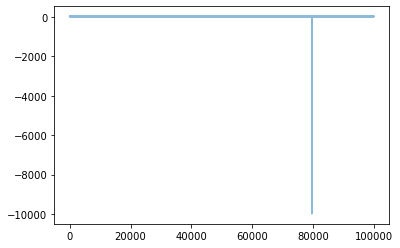

In [4]:
#finding outliers
plt.plot(data['u'], alpha = 0.5)
plt.show()
#find outliers
#plt.plot(data['g'], alpha = 0.5)
#plt.show()
#plt.plot(data['r'], alpha = 0.5)
#plt.show()
#plt.plot(data['i'], alpha = 0.5)
#plt.show()
#plt.plot(data['redshift'], alpha = 0.5)
#plt.show()

In [4]:
#when selecting data...
#print("The index of the outlier is",np.where(data['z']<0))
datagood = data.loc[np.where(data['z']>0)]
#plt.plot(datagood['u'], alpha = 0.5)

datashort = datagood[['u','g','r','i','z',"redshift",'class']]

In [6]:
datashort

,u,g,r,i,z,redshift,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,-0.001584,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,-0.824700,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,-0.418000,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,5.953000,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.846000,GALAXY
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,1.046000,GALAXY
99996,22.69118,22.38628,20.45003,19.75759,19.41526,5.290000,GALAXY
99997,21.16916,19.26997,18.20428,17.69034,17.35221,-4.145000,GALAXY
99998,25.35039,21.63757,19.91386,19.07254,18.62482,7.152000,GALAXY


# Visulization 

['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID', 'MJD', 'redshift', 'plate', 'class']


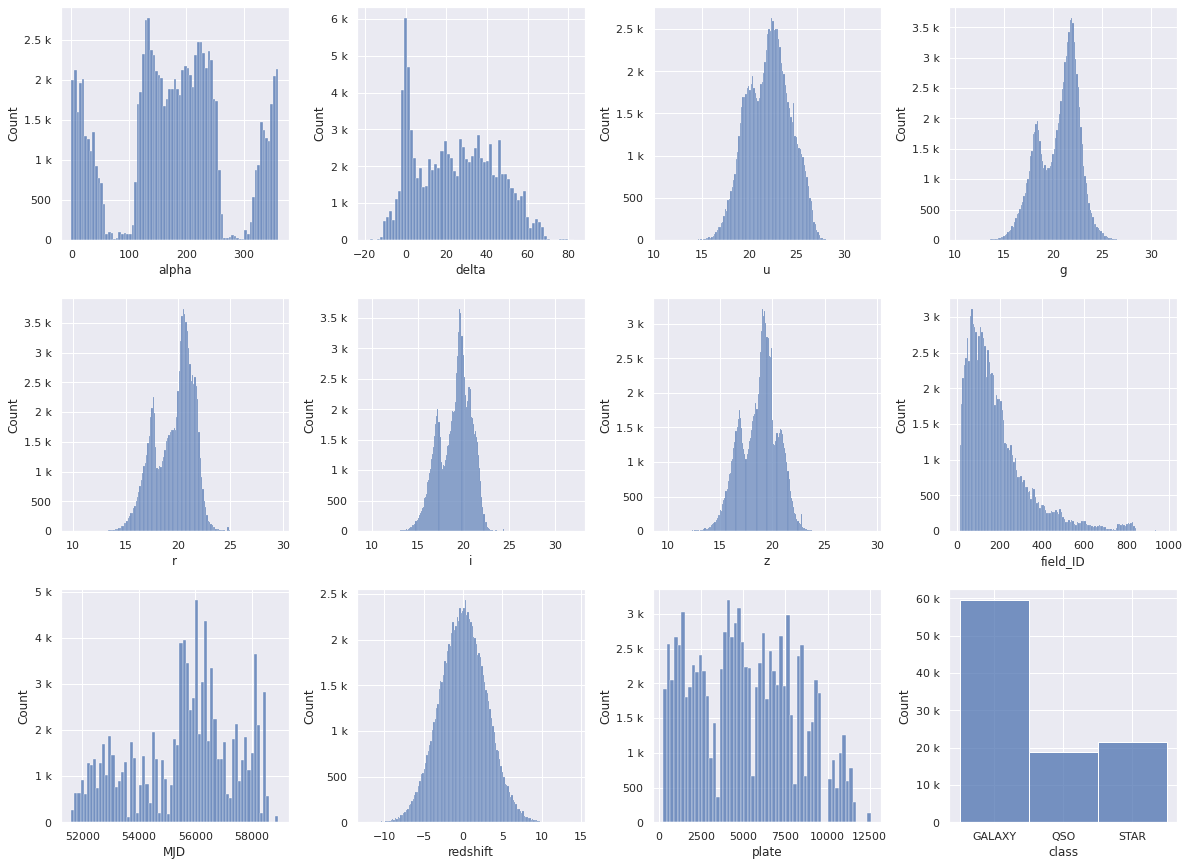

In [7]:
sns.set(font_scale=1)
fig, ax = plt.subplots(3,4, figsize = (20, 15))
ax = np.array(ax).flatten()
feature = list(datagood.columns)
print(feature)
for i, ax in enumerate(ax):
    sns.histplot(data=datagood, x=feature[i], ax = ax)
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.subplots_adjust(wspace=.3, hspace=.25)


In [12]:
# use integers to represent the class labels

data_used = datashort.copy()
data_used['class'] = data_used['class'].map({"GALAXY":1, "QSO":2, "STAR":3}) 
data_used

,u,g,r,i,z,redshift,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,-0.001584,1
1,24.77759,22.83188,22.58444,21.16812,21.61427,-0.824700,1
2,25.26307,22.66389,20.60976,19.34857,18.94827,-0.418000,1
3,22.13682,23.77656,21.61162,20.50454,19.25010,5.953000,1
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.846000,1
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,1.046000,1
99996,22.69118,22.38628,20.45003,19.75759,19.41526,5.290000,1
99997,21.16916,19.26997,18.20428,17.69034,17.35221,-4.145000,1
99998,25.35039,21.63757,19.91386,19.07254,18.62482,7.152000,1


# PCA reduction
use PCA to reduce the data into 4 dimensions

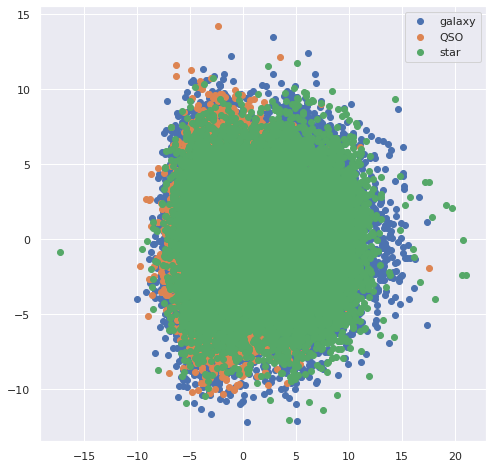

In [14]:
from sklearn.decomposition import PCA
# redeuced dimenesion
n_comp = 4
# numpy array without the class labels
data_feature = data_used.drop("class", axis = 1).to_numpy()
# class labels using strings
data_label = datagood["class"].to_numpy()
# class labels using integers
data_label_num = data_used["class"].to_numpy()
pca = PCA(n_components=n_comp)
fit = pca.fit(data_feature)
red_com = fit.transform(data_feature)

# visualize the reduced data.
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(red_com[data_label == "GALAXY"][:,0], red_com[data_label == "GALAXY"][:,1], label = "galaxy")
ax.scatter(red_com[data_label == "QSO"][:,0], red_com[data_label == "QSO"][:,1], label = "QSO")
ax.scatter(red_com[data_label == "STAR"][:,0], red_com[data_label == "STAR"][:,1], label = "star")
plt.legend()

# SVMs (support-vector machines) are supervised learning methods used for classification

In [16]:
from sklearn.cluster import KMeans
from sklearn import svm

#Cross-validation (KFold)
kfold = KFold(n_splits = 5)
print(kfold)

#train in each loop
for train_ind, test_ind in kfold.split(red_com[:10000]):
    train_X = red_com[train_ind]
    train_y = data_label_num[train_ind]
    test_X = red_com[test_ind]
    test_y = data_label_num[test_ind]
    
#     kmeans = KMeans(n_clusters=3, random_state=0).fit(train_X)
#     label = kmeans.predict(train_y)
    clf = svm.SVC()
    clf.fit(train_X,train_y)
    #accuracy
    acc = np.sum(clf.predict(test_X) == test_y)/len(test_y)
    print("accuracy {}".format(acc))
    
    

KFold(n_splits=5, random_state=None, shuffle=False)
accuracy 0.8395
accuracy 0.784
accuracy 0.7765
accuracy 0.825
accuracy 0.794
